# <h1 align="center"><font color = #119fbf>Lighthouse | Cientista de Dados | Indicium 🌎🚀</font></h1>

*Andressa Gomes Moreira - andressagomesm26@gmail.com*

## <a><font color = #119fbf>Objetivo</font></a>
O entendimento do problema de negócio e dos dados são etapas fundamentais no ciclo de vida de projetos de Ciências de Dados. Dessa forma, conhecer bem os dados, as distribuições, medidas estatísticas é essencial para gerar insights e solucionar problemas.

Nesse desafio, será realizada a análise exploratória dos dados (EDA) de um marketplace de compra e venda de veículos usados, a fim de responder às perguntas de negócios. E em seguida, serão utilizados modelos preditivos de Machine para precificar os carros do cliente. 

## <a><font color = #119fbf>Descrição do Negócio</font></a>
O time da Indicium está trabalhando junto a um cliente que o core business é compra e venda de veículos usados. Entretanto, a empresa possui dificuldades na área de revenda dos automóveis. 

Para resolver esse problema, a empresa comprou uma base de dados de um marketplace de compra e venda para entender melhor o mercado nacional e conseguir precificar o seu catálogo de forma mais competitiva e assim recuperar o mau desempenho neste setor.

O nosso objetivo, como time da Indicium, é analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar 
um modelo preditivo que precifique os carros usados, para que eles fiquem o mais próximos dos valores de mercado

    a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
    b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
    c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

## <a><font color = #119fbf>Descrição dos Dados</font></a>
Serão utilizados dois datasets:

    1. Um dataset para treinamento chamado cars_training composto por 29584 linhas, 28 colunas de informação (features) e a variável a ser prevista (“preco”).
    2. Um segundo dataset para teste chamado de cars_test composto por 9862 linhas e 28 colunas, sendo que este dataset não possui a coluna “preco”.


**Importações das bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import statistics as sts

import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

**Carregamento dos dados**

In [2]:
df = pd.read_csv('../dataset/cars_train.csv', sep=',')

In [3]:
df.head()

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,300716223898539419613863097469899222392,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,NaN,NaN,NaN,74732.590084
1,279639842134129588306469566150288644214,8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMÁTICO,2017,2017.0,62979.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,81965.332634
2,56414460810621048900295678236538171981,16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMÁTICO,2018,2019.0,44070.0,Automática,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162824.814472
3,56862509826849933428086372390159405545,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,123681.358857
4,338980975753200343894519909855598027197,8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMÁTICO,2013,2015.0,71491.0,Automática,4,...,False,NaN,NaN,Todas as revisões feitas pela concessionária,NaN,NaN,Garantia de fábrica,Todas as revisões feitas pela agenda do carro,NaN,82419.763891


**Informações sobre o DataFrame**

In [4]:
df.shape

(29584, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29584 entries, 0 to 29583
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       29584 non-null  object 
 1   num_fotos                29407 non-null  float64
 2   marca                    29584 non-null  object 
 3   modelo                   29584 non-null  object 
 4   versao                   29584 non-null  object 
 5   ano_de_fabricacao        29584 non-null  int64  
 6   ano_modelo               29584 non-null  float64
 7   hodometro                29584 non-null  float64
 8   cambio                   29584 non-null  object 
 9   num_portas               29584 non-null  int64  
 10  tipo                     29584 non-null  object 
 11  blindado                 29584 non-null  object 
 12  cor                      29584 non-null  object 
 13  tipo_vendedor            29584 non-null  object 
 14  cidade_vendedor       

### Tratamento de Valores Nulos

In [6]:
df.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_único_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fábrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

**Excluindo as *features* 'id' e 'veiculo_alienado'**

In [7]:
df = df.drop('id', axis=1)
df = df.drop('veiculo_alienado', axis=1)

Para o tratamento dos dados Missing (NaN) iremos considerar que os valores ausentes das seguintes *features* representam o sentido oposto do valor não nulo da coluna: 

    ['dono_aceita_troca'; 'veiculo_único_dono'; 'revisoes_concessionaria'; 'ipva_pago'; 'veiculo_licenciado'; 'garantia_de_fábrica'; 'revisoes_dentro_agenda']
    
**Exemplo:**

    1. 'dono_aceita_troca':  [nan, 'Aceita troca'] => ['Não aceita Troca', 'Aceita troca'].
    2. 'ipva_pago' -> ['IPVA pago', nan] = ['IPVA pago', 'ipva não pago']

In [8]:
df['dono_aceita_troca'] = df['dono_aceita_troca'].replace(np.nan, 'Nao aceita troca')
df['veiculo_único_dono'] = df['veiculo_único_dono'].replace(np.nan, 'Não é único dono')
df['revisoes_concessionaria'] = df['revisoes_concessionaria'].replace(np.nan, 'Não possui todas as revisoes feitas pela concessionaria')
df['ipva_pago'] = df['ipva_pago'].replace(np.nan, 'ipva não pago')
df['veiculo_licenciado'] = df['veiculo_licenciado'].replace(np.nan, 'Não Licenciado')
df['garantia_de_fábrica'] = df['garantia_de_fábrica'].replace(np.nan, 'Não possui garantia de fábrica')
df['revisoes_dentro_agenda'] = df['revisoes_dentro_agenda'].replace(np.nan, 'não possui todas as revisões feitas pela agenda do carro')

**Os valores nulos de número de fotos serão substituídos pela mediana**

In [9]:
mediana = sts.median(df['num_fotos'])
mediana

8.0

In [10]:
df['num_fotos'].fillna(mediana, inplace=True)
df.isnull().sum()

num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_único_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fábrica        0
revisoes_dentro_agenda     0
preco                      0
dtype: int64

### Valores Duplicados

In [11]:
df.duplicated().sum()

0

## Informações Estatísticas

**Informações estatísticas para variáveis numéricas**

In [12]:
df.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,preco
count,29584.000000,29584.000000,29584.000000,29584.000000,29584.000000,2.958400e+04
mean,10.309931,2016.758552,2017.808985,58430.592077,3.940677,1.330239e+05
std,3.481502,4.062422,2.673930,32561.769309,0.338360,8.166287e+04
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,9.869951e+03
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,7.657177e+04
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,1.143558e+05
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,1.636796e+05
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,1.359813e+06


**Informações estatísticas para as variáveis categóricas**

In [13]:
df.describe(include='object').T

,count,unique,top,freq
marca,29584,40,VOLKSWAGEN,4594
modelo,29584,457,COMPASS,1480
versao,29584,1916,1.6 16V FLEX ALLURE PACK 4P AUTOMÁTICO,1352
cambio,29584,7,Automática,22545
tipo,29584,7,Sedã,16429
blindado,29584,2,N,29336
cor,29584,7,Branco,20949
tipo_vendedor,29584,2,PF,17926
cidade_vendedor,29584,575,São Paulo,6158
estado_vendedor,29584,25,São Paulo (SP),16378


## Análise Exploratória de Dados (EDA)

In [14]:
def plot_annotate(ax, title):
    """ Adicionar anotações nos gráficos.

    Args:
        ax: Objeto do tipo Axes do Matplotlib
        title (string): Título do gráfico
    Returns:
        None
    """
    
    for rect in ax.patches:
        ax.annotate(rect.get_height(),
                (rect.get_x() + rect.get_width()/2, rect.get_height()),
                ha='center', va='baseline', fontsize=8, color='black',
                xytext=(0, 1), textcoords="offset points")
    ax.set_title(title)

**Quantidade de carros fabricados em cada ano**

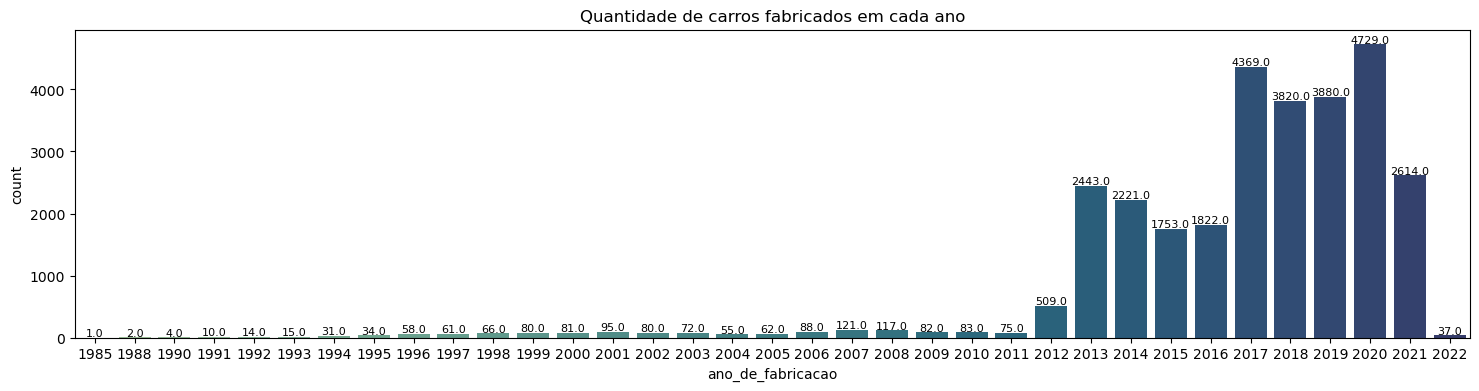

In [15]:
fig, axs = plt.subplots(figsize=(18, 4))
ax = sns.countplot(x='ano_de_fabricacao', data=df, palette="crest")

plot_annotate(ax, 'Quantidade de carros fabricados em cada ano')
plt.show()

**Distribuição de veículos pelo ano de fabricação**

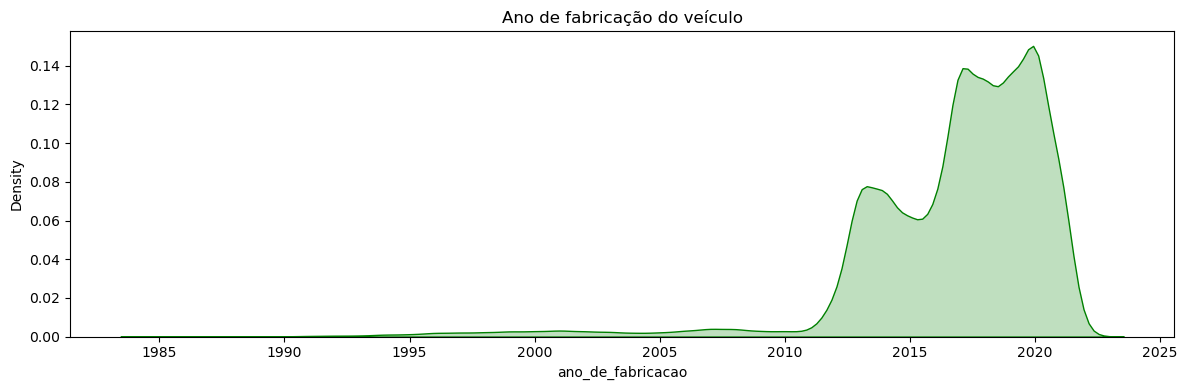

In [16]:
fig, axs = plt.subplots(figsize=(12, 4))

sns.kdeplot(df["ano_de_fabricacao"], color="Green", fill=True).set_title('Ano de fabricação do veículo');

plt.tight_layout()
plt.show()

**Distribuição de valores registrados no hodômetro do veículo**

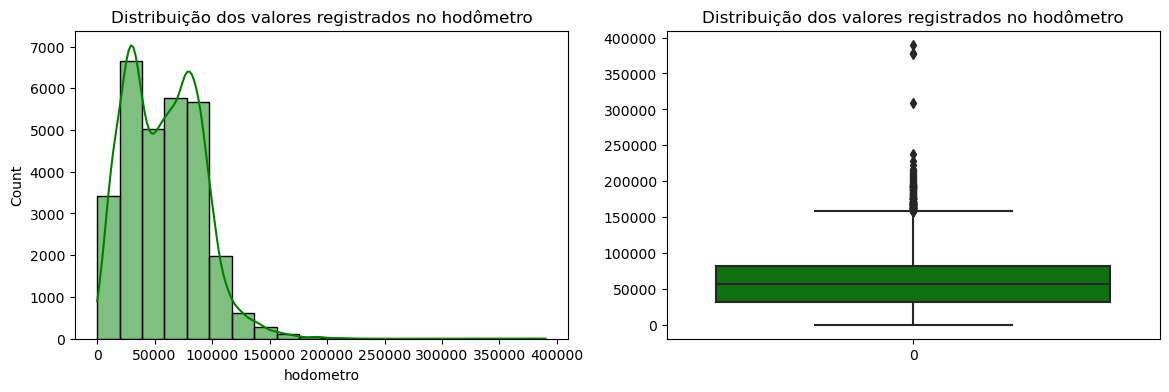

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

sns.histplot(df["hodometro"], kde=True, bins=20, color='Green', ax=axs[0]).set_title("Distribuição dos valores registrados no hodômetro")
sns.boxplot(df["hodometro"], color='Green', ax=axs[1]).set_title("Distribuição dos valores registrados no hodômetro")

plt.show()

**Distribuição dos preços dos veículos**

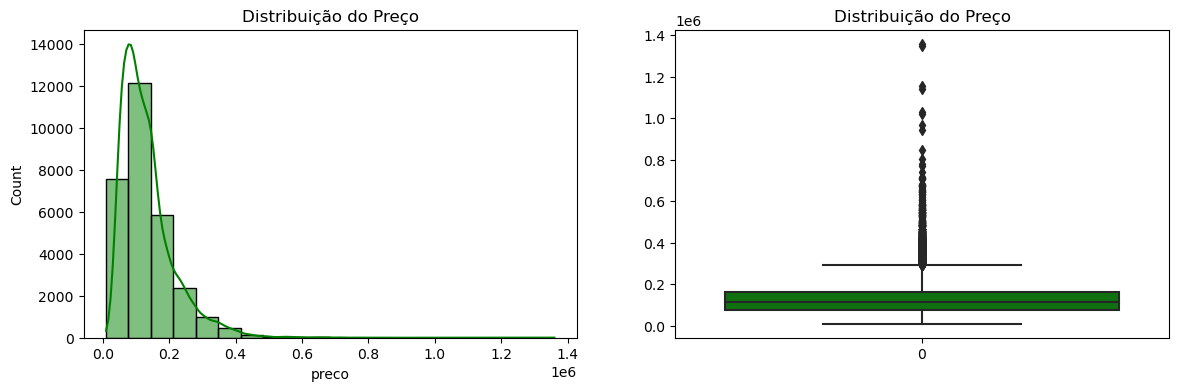

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(14,4))

sns.histplot(df["preco"], kde=True, bins=20, color='Green', ax=axs[0]).set_title("Distribuição do Preço")
sns.boxplot(df["preco"], color='Green', ax=axs[1]).set_title("Distribuição do Preço")

plt.show()

**Quantidade de veículos para cada marca**

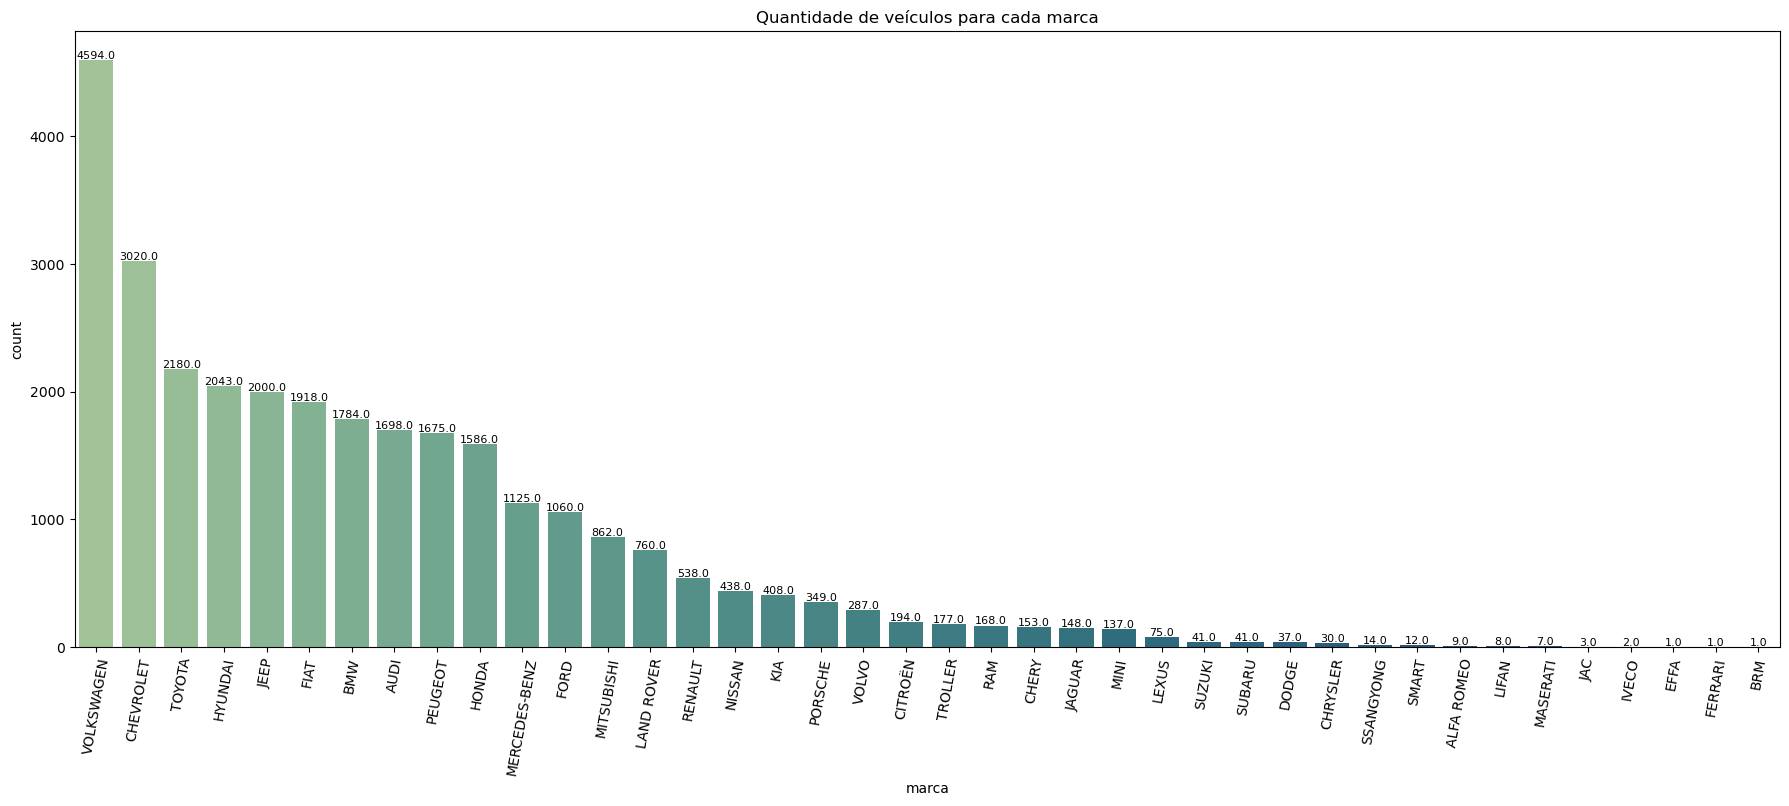

In [19]:
category_counts = df['marca'].value_counts().sort_values(ascending=False)

fig, axs = plt.subplots(figsize=(22, 8))
ax = sns.countplot(x='marca', data=df, order=category_counts.index, palette="crest")
plot_annotate(ax, 'Quantidade de veículos para cada marca')
plt.xticks(rotation=80)
plt.show()

**Distribuição de preço para as marcas mais vendidas**

In [20]:
# Marcas mais vendidas
df_count_marca = df[df['marca'].isin(category_counts[category_counts > 1000].index)]

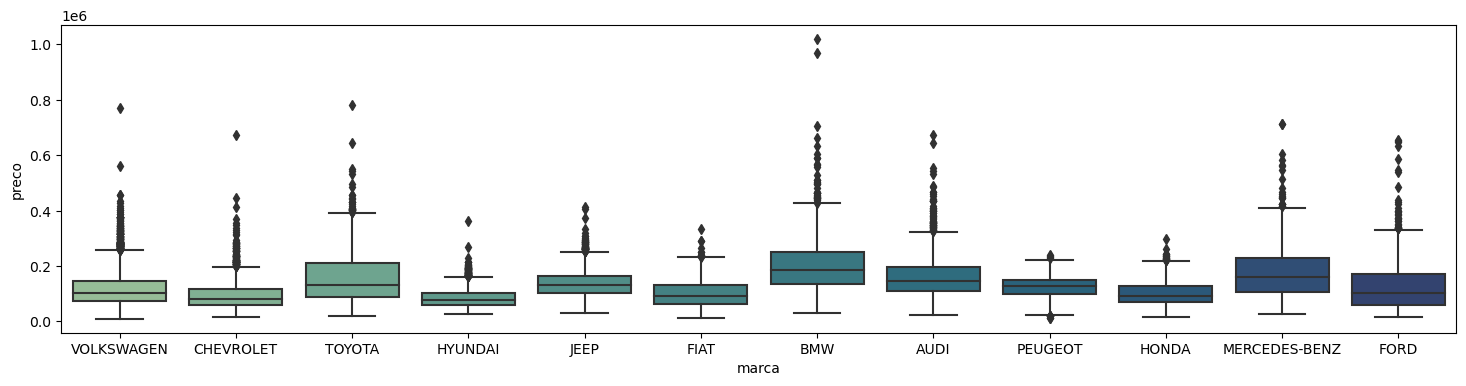

In [21]:
fig, axs = plt.subplots(figsize=(18, 4))
sns.boxplot(y='preco', x='marca', data=df_count_marca, order=category_counts.index[:12], palette="crest")

plt.show();

**Frequência para cada tipo de veículo**

In [22]:
porct_tipos = df.groupby('tipo').size() / df['tipo'].value_counts().sum() * 100 
porct_tipos = porct_tipos.sort_values(ascending=False).reset_index().rename(columns={0: 'porc'})
porct_tipos['porc'] = porct_tipos['porc'].apply(lambda x: '{:.2f}'.format(float(x)))
porct_tipos['porc'] = porct_tipos['porc'].astype(float)

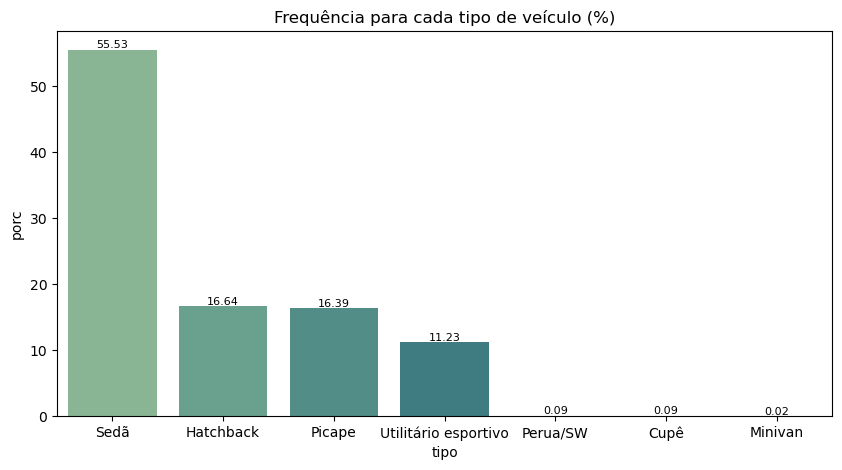

In [23]:
fig, axs = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x='tipo', y='porc', data=porct_tipos, palette="crest")
plot_annotate(ax, 'Frequência para cada tipo de veículo (%)')
plt.show();

**Informações sobre as revisões feitas em concessionárias, se as revisões foram realizadas dentro da agenda prevista e sobre a garantia de fábrica**

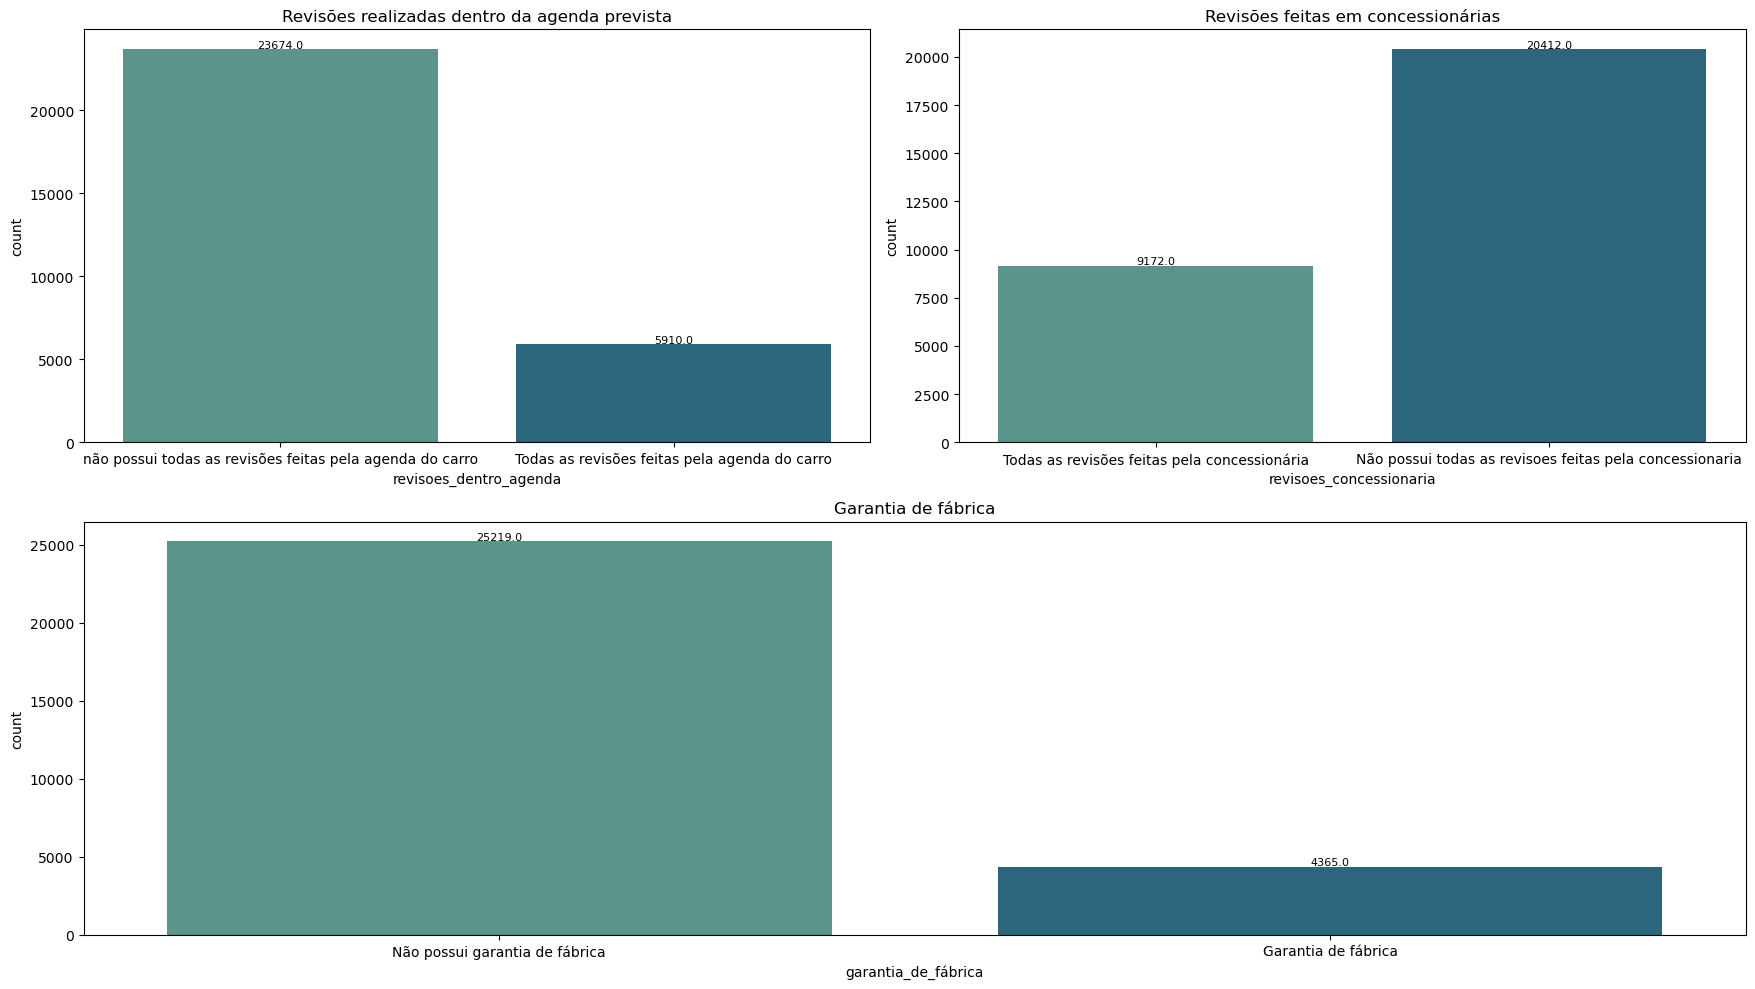

In [24]:
fig, axs = plt.subplot_mosaic("""AB
                                 CC""", figsize=(18,10))

ax1 = sns.countplot(x='revisoes_dentro_agenda', data=df, palette="crest", ax=axs['A'])
ax3 = sns.countplot(x='revisoes_concessionaria', data=df, palette="crest", ax=axs['B'])
ax2 = sns.countplot(x='garantia_de_fábrica', data=df, palette="crest", ax=axs['C'])

plot_annotate(ax1, "Revisões realizadas dentro da agenda prevista") 
plot_annotate(ax2, "Garantia de fábrica")
plot_annotate(ax3, 'Revisões feitas em concessionárias')

plt.tight_layout()
plt.show();

**Quantidade de vendedores (PJ ou PF) em cada estado)**

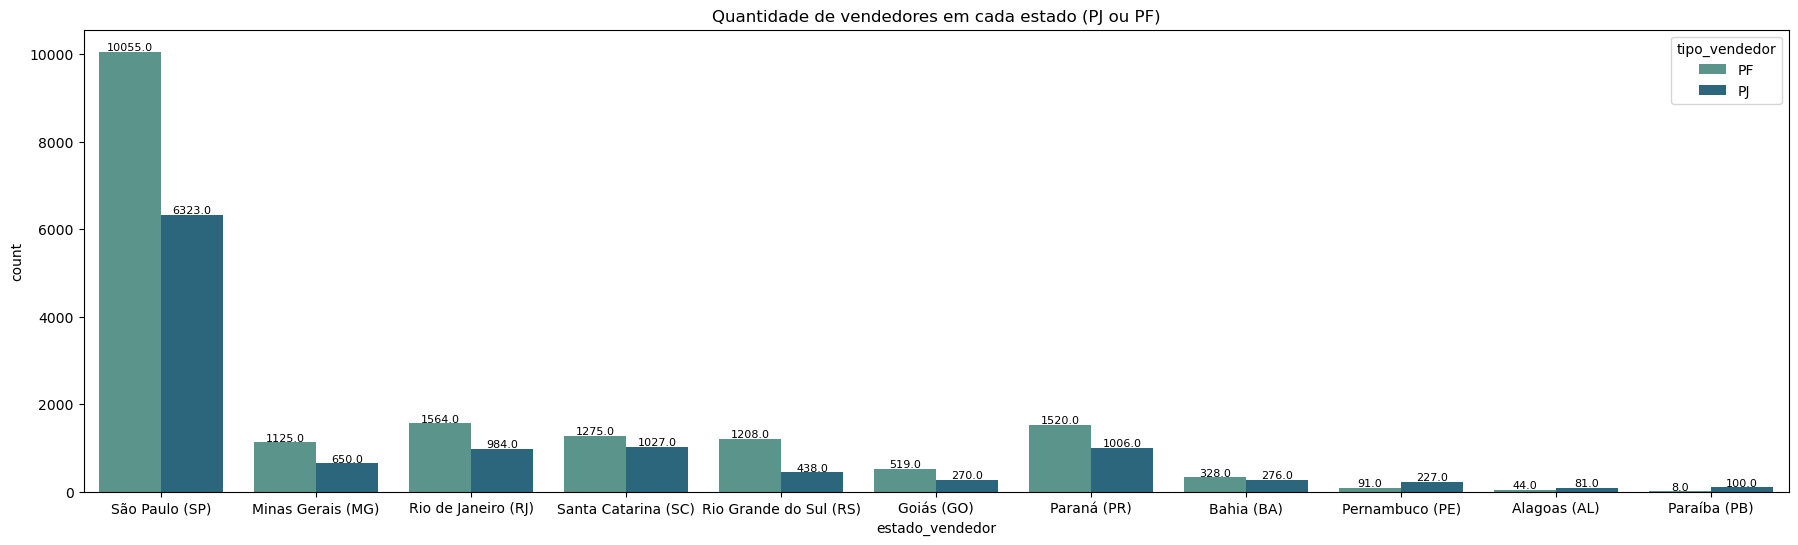

In [25]:
category_counts_est = df['estado_vendedor'].value_counts().sort_values(ascending=False)
df_count_est = df[df['estado_vendedor'].isin(category_counts_est[category_counts_est > 100].index)]

fig, axs = plt.subplots(figsize=(22, 6))
ax = sns.countplot(x='estado_vendedor', data=df_count_est, palette="crest", hue = "tipo_vendedor")

plot_annotate(ax, 'Quantidade de vendedores em cada estado (PJ ou PF)') 
plt.show();

**Quantidade anunciantes realizam entrega delivery ou não**

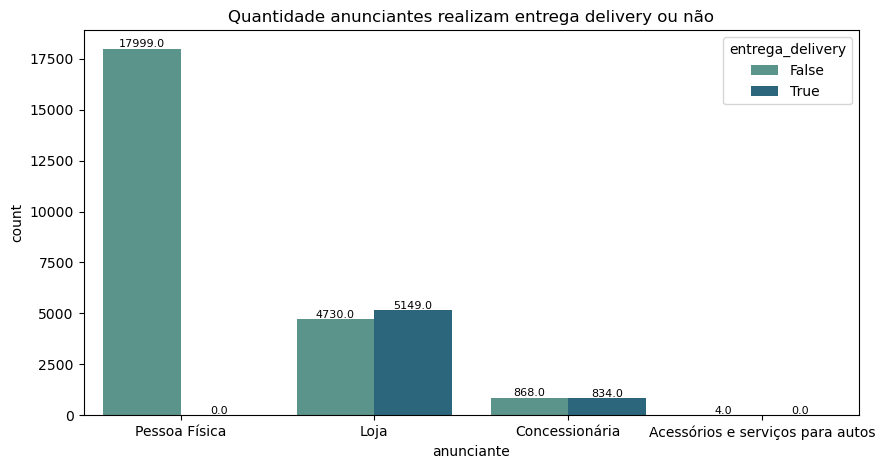

In [26]:
fig, axs = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='anunciante', data=df, palette="crest", hue = "entrega_delivery")
plot_annotate(ax, 'Quantidade anunciantes realizam entrega delivery ou não') 
plt.show()

## Hipóteses de Negócio

1. Existe relação entre o valor registrado no hodômetro do veículo e o preço?
2. O tipo de veículo interfere na média de preço?
3. Existe associação entre as variáveis IPVA PAGO e Veículo licenciado?

<!--* Coeficiente de correlação de Pearson (Pearson's r): É usado para medir a força e a direção da relação linear entre duas variáveis contínuas. É comumente aplicado quando você deseja determinar se existe uma relação linear significativa entre duas variáveis contínuas, como idade e pressão arterial.-->

### Hipótese de negócio 1

**Hipótese de negócio:** Existe relação entre o valor registrado no hodômetro do veículo e o preço?
    
    Hipótese Nula (H0): Não há correlação entre as variáveis
    Hipótese Alternativa (Ha): Há correlação entre as variáveis

Para testar as hipóteses acima será realizada a Análise Exploratória dos Dados e o teste de hipóteses. Para realizar o teste de hipótese, será utilizado o Coeficiente de correlação de Pearson, pois, queremos medir a relação entre as duas variáveis contínuas.

In [27]:
# Coef. de Correlação de Pearson
corr, p_value = stats.pearsonr(df['hodometro'], df['preco'])

# Nível de significância
alpha = 0.02

In [28]:
if p_value < alpha:
    print("Rejeita a H0. Há uma correlação entre as variáveis.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma correlação nenhuma entre as variáveis.")

Rejeita a H0. Há uma correlação entre as variáveis.


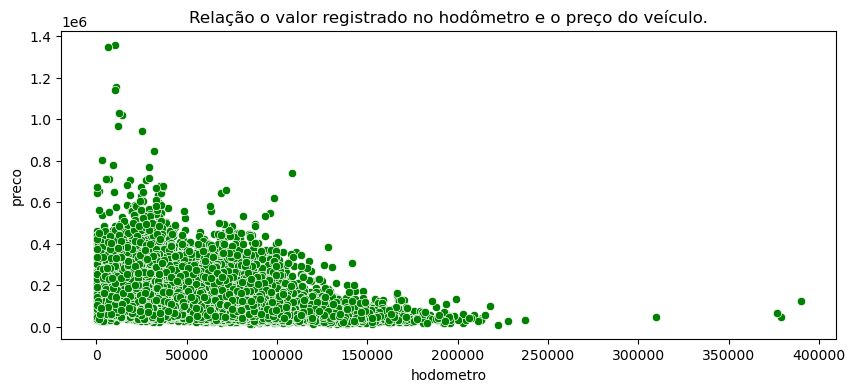

In [29]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.scatterplot(x='hodometro', y='preco', data=df, color='green').set_title('Relação o valor registrado no hodômetro e o preço do veículo.')

plt.show();

> ✅ De acordo com o teste de hipótese realizado e iremos **rejeitar H0** e **aceitar Ha**, ou seja, existe uma correlação entre valor registrado no hodômetro e o preço do veículo. Entretanto, trata-se de uma correlação fraca e negativa, ou seja, à medida que o valor registrado no hidômetro aumenta, o preço do veículo tende a diminuir. No entanto, a relação não é muito forte, o que significa que os dados não seguem um padrão consistente.

<!--* ANOVA (Análise de Variância): A ANOVA é usada quando você tem mais de dois grupos e deseja comparar as médias de uma variável contínua entre esses grupos. Por exemplo, se você quiser testar se há diferenças nas médias de renda entre diferentes níveis de escolaridade (por exemplo, ensino fundamental, ensino médio e ensino superior), você pode realizar uma ANOVA.


O tipo de do veículo interfere na média de preço do veículo?

**Hipótese de negócio:** Existe diferença entre o preço médio dos diferentes tipos de veículo
    
    H0: Não há diferença significativa nos preços médios entre os tipos de veículos.
    Ha: Há diferença significativa nos preços médios entre os tipos de veículos.
    >-->
### Hipótese de negócio 2

**Hipótese de negócio:** O tipo de veículo interfere na média de preço? 
    
    Hipótese Nula (H0): Não há diferença significativa nos preços médios dos tipos de veículos.
    Hipótese Alternativa (Ha): Há diferença significativa nos preços médios entre os tipos de veículos.

Para realizar o Teste de Hipótese, será utilizado a Análise de Variância (ANOVA), pois, queremos comparar as médias da variável contínua (Preço) entre os grupos (Tipos de veículos)

In [30]:
# ANOVA
model1 = ols('preco ~ tipo', data=df).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)

# p_value
p_value = anova_table['PR(>F)'][0]

# Nível de significância
alpha = 0.05

In [31]:
if p_value < alpha:
    print("Rejeita a H0. Há uma diferença significativa entre as médias dos grupos.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma diferença significativa entre as médias dos grupos.")

Rejeita a H0. Há uma diferença significativa entre as médias dos grupos.


> De acordo com o teste de hipótese realizado iremos **rejeitar H0** e **aceitar Ha**, ou seja, existe uma diferença entre o preço médio dos diferentes tipos de veículos.

**Média dos preços para cada tipo de veículo**

In [32]:
df_anova = pd.DataFrame({'tipo': df['tipo'], 'media_preco': df['preco']})
df_anova = df_anova.groupby('tipo')['media_preco'].mean().reset_index().sort_values(by='media_preco', ascending=False)
df_anova

,tipo,media_preco
0,Cupê,413260.359561
6,Utilitário esportivo,226122.989181
4,Picape,158906.210818
5,Sedã,118191.936375
3,Perua/SW,110059.507733
1,Hatchback,92955.616973
2,Minivan,65217.048192


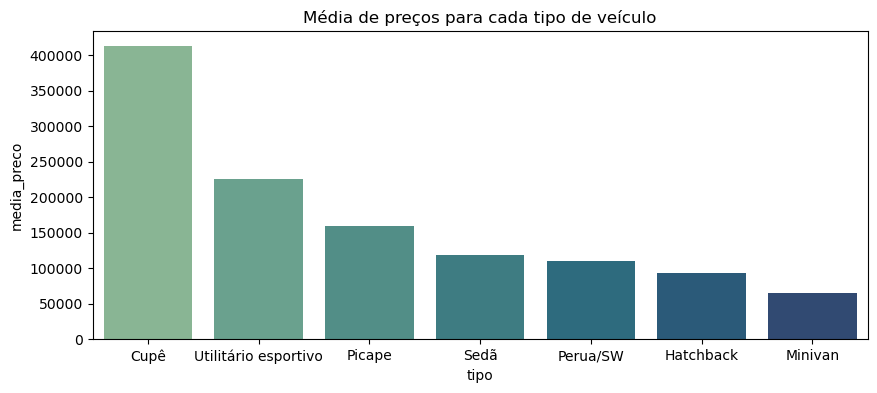

In [33]:
fig, axs = plt.subplots(figsize=(10, 4))
sns.barplot(x='tipo', y='media_preco', data=df_anova, palette="crest").set_title('Média de preços para cada tipo de veículo')
plt.show();

**Distribuição dos preços para cada tipo de veículo**

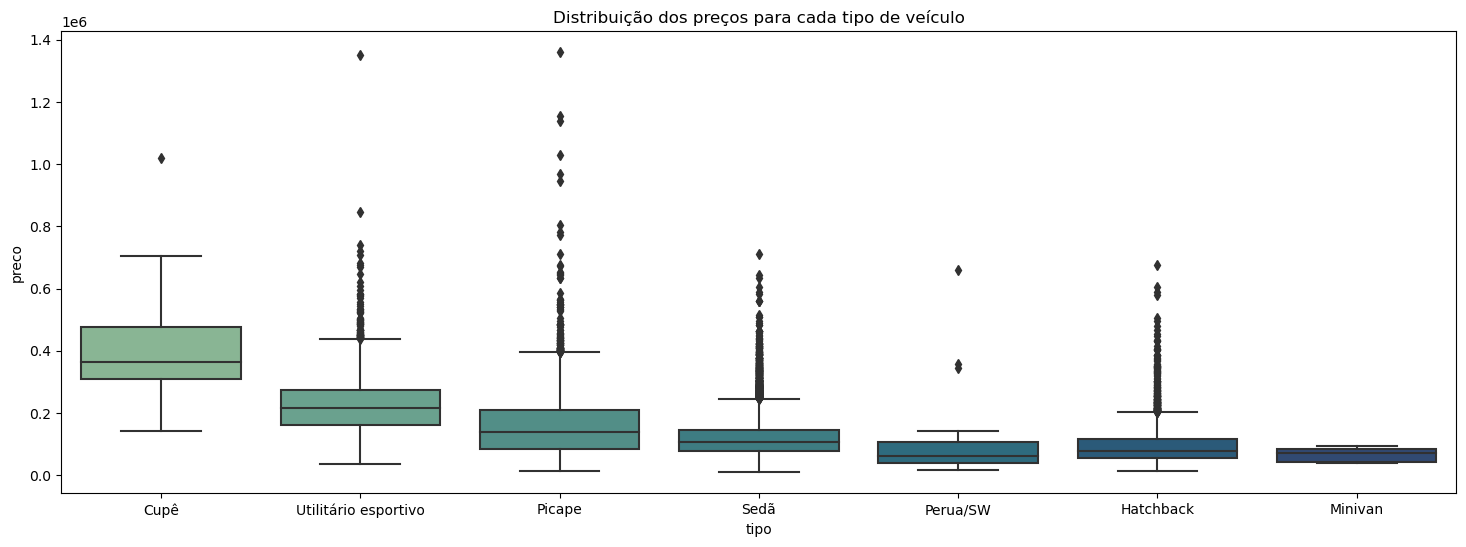

In [34]:
fig, axs = plt.subplots(figsize=(18, 6))
sns.boxplot(y='preco', x='tipo', data=df, order=df_anova['tipo'].values, palette="crest").set_title('Distribuição dos preços para cada tipo de veículo')
plt.show();

> ✅ É possível observar pela distribuição apresentada que os o tipo de veículo interfere na média dos preços.

<!--* Qui-quadrado: O teste do qui-quadrado é usado quando você tem uma variável categórica e deseja testar se existe uma associação entre essa variável e outra variável categórica. Por exemplo, você pode usar um teste qui-quadrado para determinar se há uma associação entre gênero (masculino ou feminino) e preferência por um determinado tipo de filme (por exemplo, ação ou romance).
Defina as hipóteses nula e alternativa:

Hipótese nula (H0): Não há associação entre "IPVA pago" e "Licenciamento pago".
Hipótese alternativa (Ha): Há associação entre "IPVA pago" e "Licenciamento pago".-->

### Hipótese de negócio 3

**Hipótese de negócio:** Existe associação entre as variáveis IPVA PAGO e Veículo licenciado?
    
    Hipótese Nula (H0): Não há associação entre "IPVA Pago" e "Licenciamento pago".
    Hipótese Alternativa (Ha): Há associação entre "IPVA Pago" e "Licenciamento pago".

Para testar as hipóteses acima será utilizado o teste do qui-quadrado, pois, queremos testar a associação entre duas variáveis categóricas.

In [35]:
# Tabela de Contingência
tabela_conting = pd.crosstab( df['ipva_pago'], df['veiculo_licenciado'])

# Teste qui-quadrado
chi2, p_value, _, _ = chi2_contingency(tabela_conting)

# Nível de significância
alpha = 0.05

In [36]:
if p_value < alpha:
    print("Rejeita a H0. Há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.")
else:
    print("Não há indícios para rejeitar a H0. Não há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.")

Rejeita a H0. Há uma associação significativa entre as variáveis IPVA Pago e Licenciamento Pago.


**Associação entre as variáveis IPVA Pago e Veículo Licenciado**

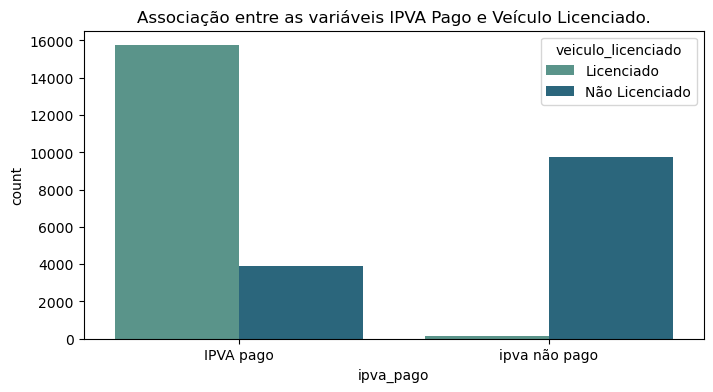

In [37]:
fig, axs = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x='ipva_pago', hue='veiculo_licenciado', palette="crest").set_title('Associação entre as variáveis IPVA Pago e Veículo Licenciado.')
plt.show();

> ✅ Em geral, os veículos que possuem o IPVA pago também possuem o Licenciamento pago. Da mesma forma, a maioria dos veículos que não possuem IPVA pago também não possuem Licenciamento pago.

## Perguntas de Negócio

    a. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
    b. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?
    c. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

## Pergunta de negócio 1

<!-- **a.** Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?
 
     - Para responder essa pergunta iremos considerar os carros populares aqueles que possuem valor abaixo de 80.000.
     - Iremos considerar os estados que oferecem garantia de fábrica e revisões dentro da agenda, pois, esses fatores poderá dar ao cliente mais confiança na hora da compra.
     - Observaremos a média dos preços dos carros populares em cada estado, para verificar aqueles em que a média de preço é mais alta
--->
     
     
<blockquote class="callout callout_default" theme="📌">
  <h3>📌 1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?</h3>
  
  <p>Para responder essa pergunta iremos considerar que os carros populares são aqueles que possuem valor abaixo de 80.000.</p>
  <p>Iremos considerar os estados que oferecem garantia de fábrica e revisões dentro da agenda, pois, esses fatores poderão dar ao cliente mais confiança na hora de efetuar a compra do carro popular.</p>
  <p>Observaremos a média e a mediana dos preços dos carros populares em cada estado, para verificar aqueles em que a distribuição de preços é mais alta.</p>
</blockquote>

In [38]:
df_carros_populares = df[df['preco'] < 80000]
df_carros_populares.head(3)

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
0,8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,Sedã,...,False,False,Nao aceita troca,Não é único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,74732.590084
5,13.0,HYUNDAI,HB20S,1.0 COMFORT PLUS 12V FLEX 4P MANUAL,2017,2018.0,85314.0,Manual,4,Sedã,...,True,False,Aceita troca,Não é único dono,Não possui todas as revisoes feitas pela conce...,ipva não pago,Não Licenciado,Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,51325.846909
7,15.0,HONDA,FIT,1.5 LX 16V FLEX 4P AUTOMÁTICO,2016,2017.0,95054.0,Automática,4,Hatchback,...,False,False,Aceita troca,Não é único dono,Não possui todas as revisoes feitas pela conce...,ipva não pago,Não Licenciado,Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,46263.040151


In [39]:
df_carros_popularesf = df_carros_populares.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).agg(media_preco=('preco', 'mean')).reset_index()
df_carros_popularesf

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,media_preco
0,Acre (AC),Garantia de fábrica,não possui todas as revisões feitas pela agend...,72811.745577
1,Acre (AC),Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,62812.803226
2,Acre (AC),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,51997.502474
3,Alagoas (AL),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55861.243630
4,Alagoas (AL),Garantia de fábrica,não possui todas as revisões feitas pela agend...,64103.417434
...,...,...,...,...
56,São Paulo (SP),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,64187.042686
57,São Paulo (SP),Garantia de fábrica,não possui todas as revisões feitas pela agend...,66180.936241
58,São Paulo (SP),Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,57305.219154
59,São Paulo (SP),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,58073.561045


In [40]:
df_carros_populares_com = df_carros_popularesf.loc[(df_carros_popularesf['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') 
                                                 & (df_carros_popularesf['garantia_de_fábrica'] == 'Garantia de fábrica')].sort_values(by='media_preco', ascending=False)
df_carros_populares_com.head()

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,media_preco
33,Pará (PA),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,69592.002015
42,Rio Grande do Sul (RS),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,68648.874151
37,Pernambuco (PE),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,68354.036170
40,Rio Grande do Norte (RN),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,66213.423172
56,São Paulo (SP),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,64187.042686


In [41]:
df_carros_populares_sem = df_carros_popularesf.loc[(df_carros_popularesf['revisoes_dentro_agenda'] != 'Todas as revisões feitas pela agenda do carro') 
                                                & (df_carros_popularesf['garantia_de_fábrica'] != 'Garantia de fábrica')].sort_values(by='media_preco', ascending=False)
df_carros_populares_sem.head()

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,media_preco
22,Mato Grosso (MT),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,67960.821865
32,Paraíba (PB),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,65755.929512
17,Espírito Santo (ES),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,64517.813784
21,Goiás (GO),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,64307.431228
50,Roraima (RR),Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,63613.691193


**Média dos preços de carros populares para cada estado (com garantia de fábrica e revisões)**

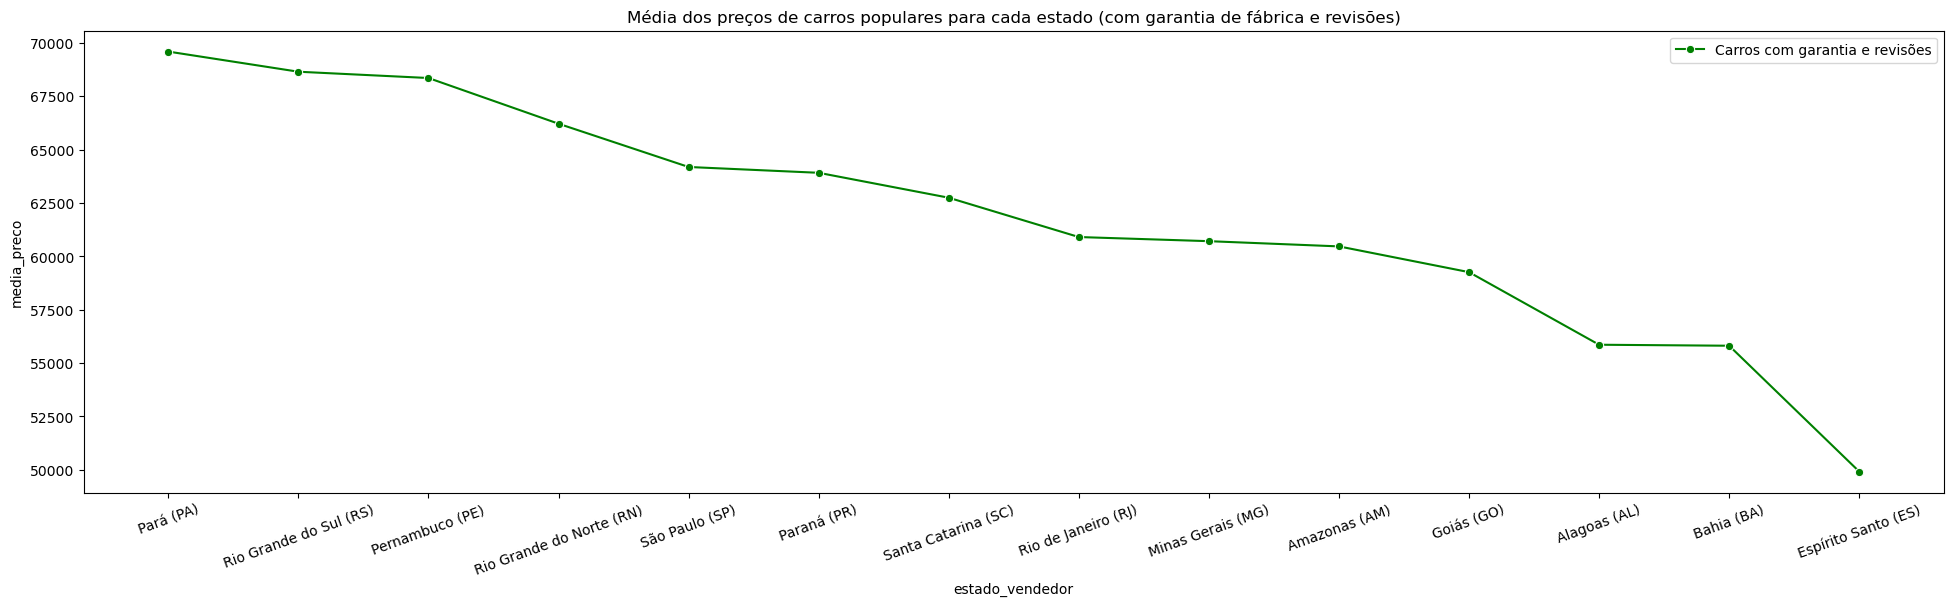

In [42]:
fig, axs = plt.subplots(figsize=(24, 6))
ax = sns.lineplot(x='estado_vendedor', y='media_preco', data=df_carros_populares_com,  legend="full", label='Carros com garantia e revisões', color='green', marker='o').set_title('Média dos preços de carros populares para cada estado (com garantia de fábrica e revisões)')
#ax = sns.lineplot(x='estado_vendedor', y='media_preco', data=df_carros_populares_sem,  legend="full", label='Carros sem garantia e revisões', color='red', marker='o').set_title('Média dos preços de carros populares para cada estado (com garantia de fábrica e revisões)')


plt.xticks(rotation=20)
plt.show();

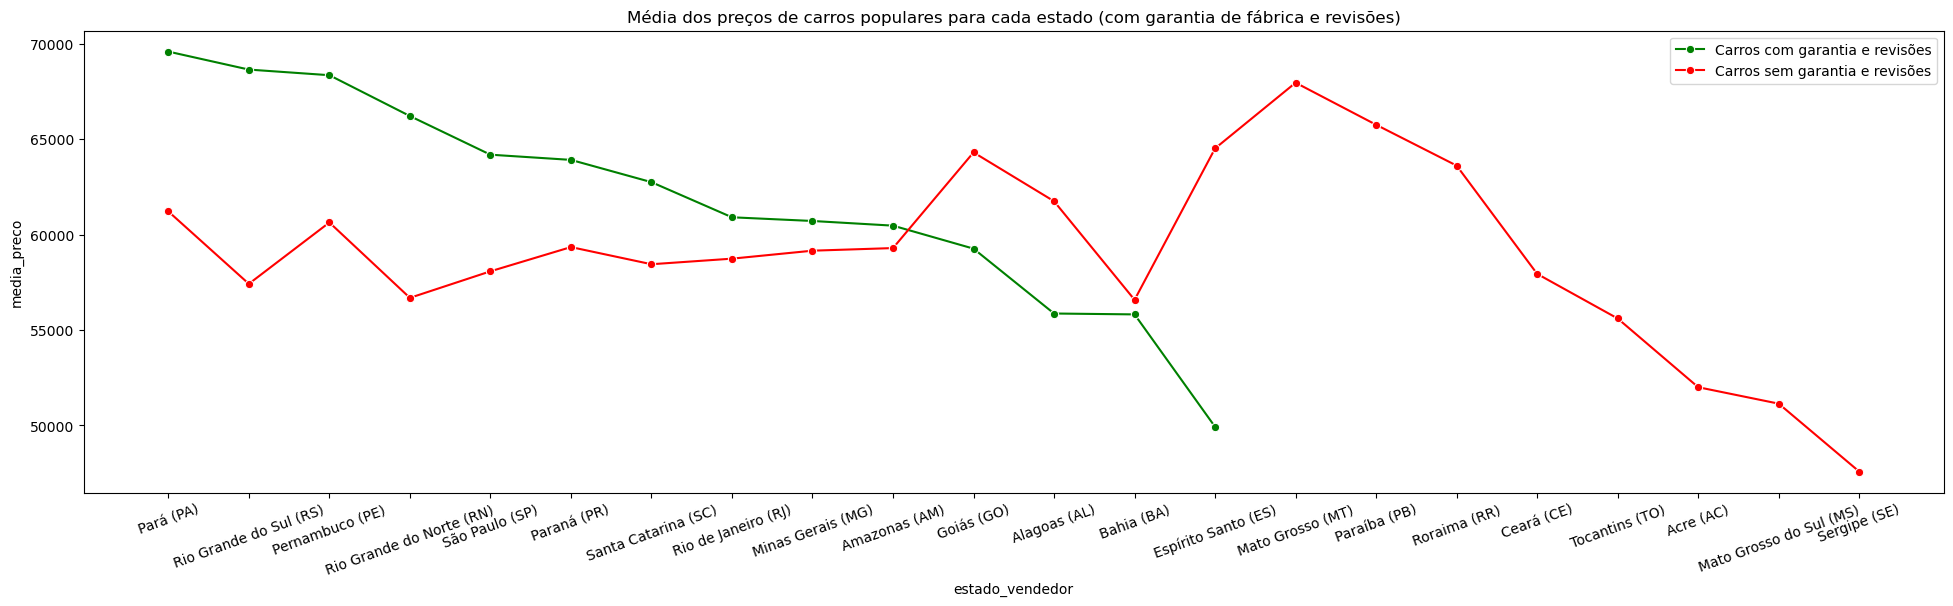

In [43]:
fig, axs = plt.subplots(figsize=(24, 6))
ax = sns.lineplot(x='estado_vendedor', y='media_preco', data=df_carros_populares_com,  legend="full", label='Carros com garantia e revisões', color='green', marker='o').set_title('Média dos preços de carros populares para cada estado (com garantia de fábrica e revisões)')
ax = sns.lineplot(x='estado_vendedor', y='media_preco', data=df_carros_populares_sem,  legend="full", label='Carros sem garantia e revisões', color='red', marker='o').set_title('Média dos preços de carros populares para cada estado (com garantia de fábrica e revisões)')


plt.xticks(rotation=20)
plt.show();

**Segunda alternativa - Mediana de valores**

In [44]:
df_carros_populares2 = df_carros_populares.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'preco']).size().reset_index(name='Total')
df_carros_populares2 = df_carros_populares2.loc[(df_carros_populares2['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') 
                                                & (df_carros_populares2['garantia_de_fábrica'] == 'Garantia de fábrica')]
df_carros_populares2.head()

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,preco,Total
16,Alagoas (AL),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,55861.243630,1
44,Amazonas (AM),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,54908.191330,1
45,Amazonas (AM),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,66026.673750,1
72,Bahia (BA),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,33100.914663,1
73,Bahia (BA),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,49027.378295,1


**Distribuição dos preços dos carros de marca popular para cada estado**

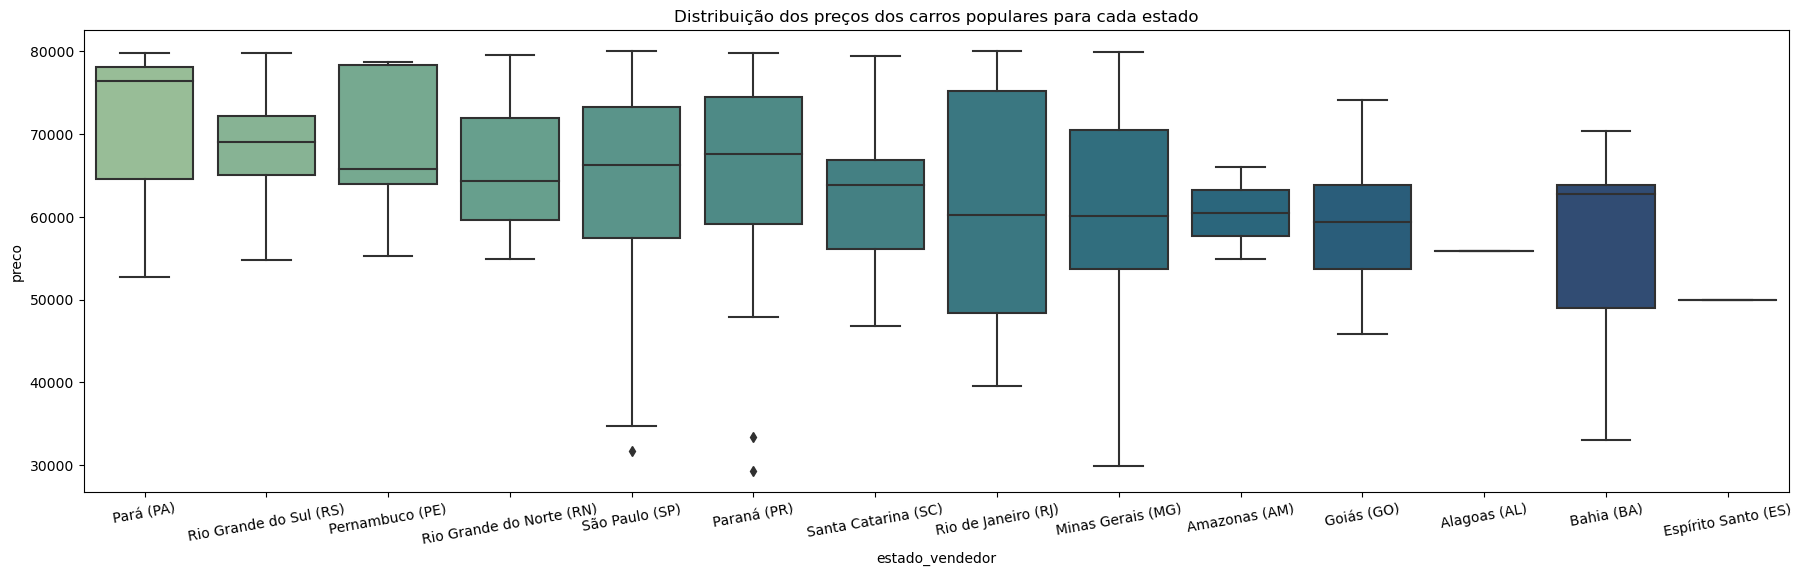

In [45]:
fig, axs = plt.subplots(figsize=(22, 6))
sns.boxplot(y='preco', x='estado_vendedor', data=df_carros_populares2, order=df_carros_populares_com['estado_vendedor'], palette="crest").set_title('Distribuição dos preços dos carros populares para cada estado')
plt.xticks(rotation=10)
plt.show();

<blockquote class="callout callout_default" theme="✅">
  <h3>✅ 1. Qual o melhor estado cadastrado na base de dados para se vender um carro de marca popular e por quê?</h3>
  <p>Analisando a mediana e a média dos preços dos veículos, que possuem garantia de fábrica e revisões feitas, o melhor estado para se vender um carro de marca popular é o Pará (PA).</p>
</blockquote>

## Pergunta de negócio 2
          
<blockquote class="callout callout_default" theme="📌">
  <h3>📌 2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?</h3>
  <p>Para responder essa pergunta, vamos considerar o veículo do tipo 'Picape' com câmbio automático, excluído os veículos com câmbio manual e Semi-automática.<p>
  <p>Para determinar qual o melhor estado, vamos considerar a disponibilidade de veículos em cada um deles</p>
  <p>Além disso, iremos considerar apenas os veículos que possuem Ipva Pago e Licenciamento Pago, por serem fatores de interesse na compra de um veículo.</p>
  <p>Por fim, o último fator de interesse seria se o vendedor entrega delivery, pois isso facilitaria a compra independentemente do estado.</p> 
</blockquote>

In [46]:
df_picape = df[df['tipo']=='Picape']
df_picape_automatico = df_picape.loc[~df_picape['cambio'].isin(['Manual', 'Semi-automática'])]
df_picape_automatico.head(3)

,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,tipo,...,troca,elegivel_revisao,dono_aceita_troca,veiculo_único_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fábrica,revisoes_dentro_agenda,preco
3,14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automática,4,Picape,...,True,False,Aceita troca,Não é único dono,Não possui todas as revisoes feitas pela conce...,IPVA pago,Licenciado,Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,123681.358857
48,8.0,VOLKSWAGEN,GOLF,1.4 TSI HIGHLINE 16V GASOLINA 4P AUTOMÁTICO,2013,2015.0,61472.0,Automática,4,Picape,...,False,False,Nao aceita troca,Não é único dono,Todas as revisões feitas pela concessionária,IPVA pago,Licenciado,Não possui garantia de fábrica,Todas as revisões feitas pela agenda do carro,86304.702755
61,8.0,FIAT,TORO,1.8 16V EVO FLEX FREEDOM AT6,2017,2017.0,101623.0,Automática,4,Picape,...,False,False,Aceita troca,Não é único dono,Não possui todas as revisoes feitas pela conce...,ipva não pago,Não Licenciado,Não possui garantia de fábrica,não possui todas as revisões feitas pela agend...,89522.637708


In [47]:
df_picape_automatico_agrupado = df_picape_automatico.groupby(['estado_vendedor', 'ipva_pago', 'veiculo_licenciado', 'entrega_delivery']).size().reset_index(name='Total')
df_picape_automatico_final = df_picape_automatico_agrupado.loc[(df_picape_automatico_agrupado['ipva_pago'] == 'IPVA pago') 
                                                 & (df_picape_automatico_agrupado['veiculo_licenciado'] == 'Licenciado')
                                                 & (df_picape_automatico_agrupado['entrega_delivery'] == True)].sort_values(by='Total', ascending=False)
df_picape_automatico_final

,estado_vendedor,ipva_pago,veiculo_licenciado,entrega_delivery,Total
61,São Paulo (SP),IPVA pago,Licenciado,True,124
47,Rio de Janeiro (RJ),IPVA pago,Licenciado,True,22
53,Santa Catarina (SC),IPVA pago,Licenciado,True,18
21,Minas Gerais (MG),IPVA pago,Licenciado,True,7
41,Rio Grande do Sul (RS),IPVA pago,Licenciado,True,6
0,Acre (AC),IPVA pago,Licenciado,True,3
11,Goiás (GO),IPVA pago,Licenciado,True,3
27,Paraná (PR),IPVA pago,Licenciado,True,3
38,Piauí (PI),IPVA pago,Licenciado,True,1


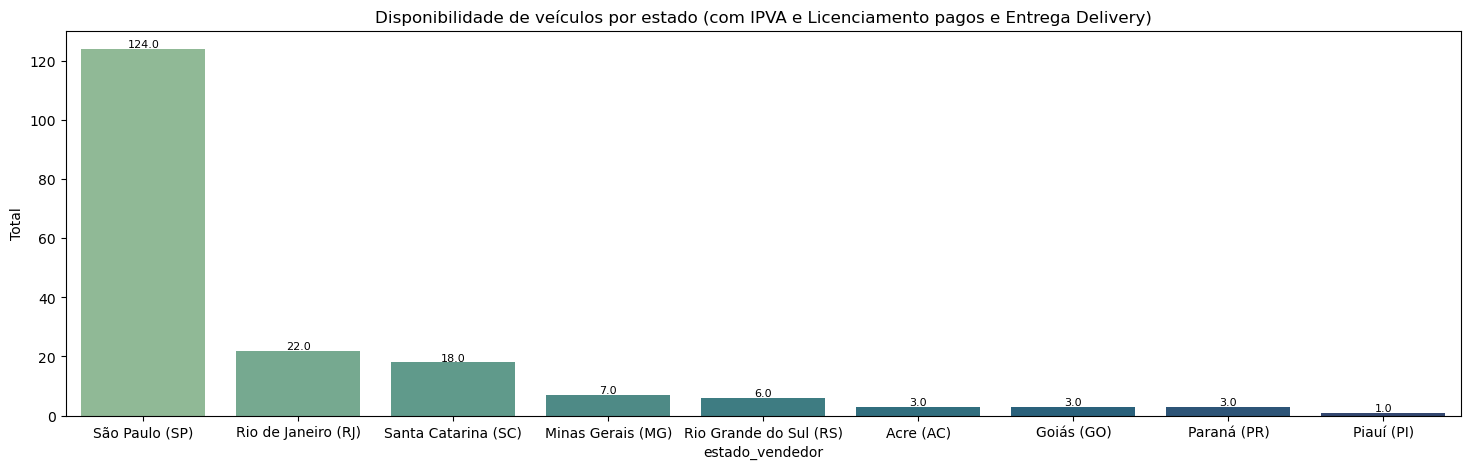

In [48]:
fig, axs = plt.subplots(figsize=(18, 5))
ax = sns.barplot(x='estado_vendedor', y='Total', data=df_picape_automatico_final, palette="crest")
plot_annotate(ax, 'Disponibilidade de veículos por estado (com IPVA e Licenciamento pagos e Entrega Delivery)')
plt.show();

<blockquote class="callout callout_default" theme="✅">
  <h3>✅ 2. Qual o melhor estado para se comprar uma picape com transmissão automática e por quê?</h3>
  <p>Analisando os dados, o melhor estado para se comprar uma picape com transmissão automática seria São Paulo (SP), pois, é o estado com a maior disponibilidade de picapes com transmissão automática, com IPVA pago e Licenciamento pago e que realizam entrega delivery.</p>
</blockquote>

## Pergunta de negócio 3
          
<blockquote class="callout callout_default" theme="📌">
  <h3>📌 3. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?</h3>
  <p>Para essa pergunta, vamos considerar apenas os veículos que possuem garantia de fábrica e os veículos que possuem revisões dentro da agenda, pois revisões realizadas regularmente pode ajudar a manter a garantia de fábrica válida e garantir o bom funcionamento do veículo. </p>
      
  <p>Além disso, vamos analisar a média dos preços dos veículos.</p>
</blockquote>

In [49]:
df_garantia_fab = df.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda']).agg(mediana_preco=('preco', 'median')).reset_index()

df_garantia_fab = df_garantia_fab.loc[(df_garantia_fab['garantia_de_fábrica'] == 'Garantia de fábrica')
                         & (df_garantia_fab['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro')].sort_values(by='mediana_preco', ascending=True) 
df_garantia_fab

,estado_vendedor,garantia_de_fábrica,revisoes_dentro_agenda,mediana_preco
8,Amazonas (AM),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,101150.518799
18,Espírito Santo (ES),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,105139.248966
45,Pará (PA),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,108867.051283
31,Mato Grosso do Sul (MS),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,118556.258157
4,Alagoas (AL),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,127070.494089
54,Rio Grande do Norte (RN),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,132364.271297
35,Minas Gerais (MG),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,142535.509455
67,Santa Catarina (SC),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,146241.440217
74,São Paulo (SP),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,146438.579416
22,Goiás (GO),Garantia de fábrica,Todas as revisões feitas pela agenda do carro,146663.549131


In [50]:
df_garantia_fab = df.groupby(['estado_vendedor', 'garantia_de_fábrica', 'revisoes_dentro_agenda', 'preco']).size().reset_index(name='Total')
df_garantia_fab = df_garantia_fab.loc[(df_garantia_fab['revisoes_dentro_agenda'] == 'Todas as revisões feitas pela agenda do carro') 
                                                & (df_garantia_fab['garantia_de_fábrica'] == 'Garantia de fábrica')]

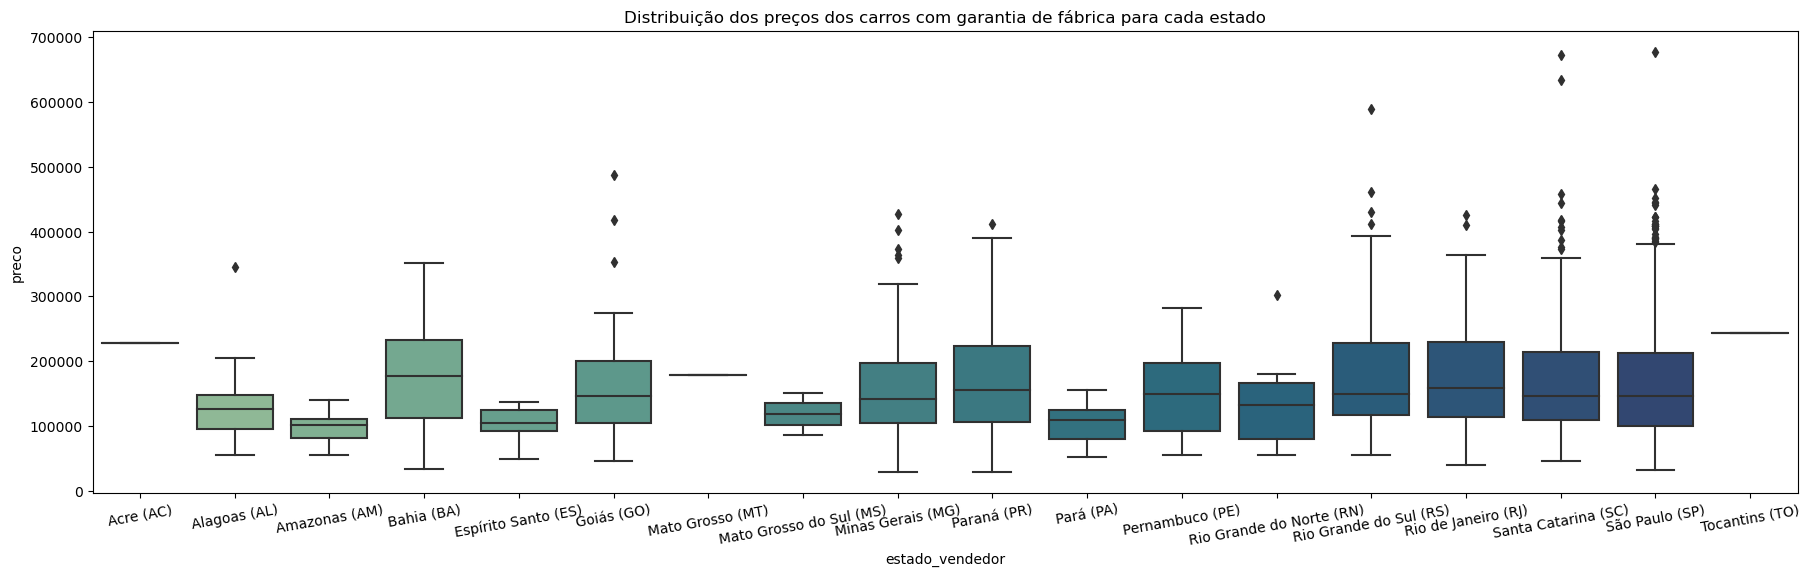

In [51]:
fig, axs = plt.subplots(figsize=(22, 6))
sns.boxplot(y='preco', x='estado_vendedor', data=df_garantia_fab, palette="crest").set_title('Distribuição dos preços dos carros com garantia de fábrica para cada estado')
plt.xticks(rotation=10)
plt.show();

<blockquote class="callout callout_default" theme="✅">
  <h3>✅ 3. Qual o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica e por quê?</h3>
  <p>Analisando os dados, o melhor estado para se comprar carros que ainda estejam dentro da garantia de fábrica é o Amazonas (AM), pois, é o estado que possui a menor mediana dos preços do veículo que possuem garantia de fábrica e revisões dentro da agenda.</p>
</blockquote>